In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score


In [2]:
df=pd.read_csv("C:\\Users\\KIIT\\Downloads\\kaggle\\spam.csv",encoding = "ISO-8859-1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# removing unwanted cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# renaming cols
df.rename({'v1':'target','v2':"text"},axis=1,inplace=True)

In [18]:
# check for null 
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicated 
df.duplicated().sum()

403

In [5]:
# remove duplicates
df.drop_duplicates(keep='first',inplace=True)


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape


(5169, 2)

# eda

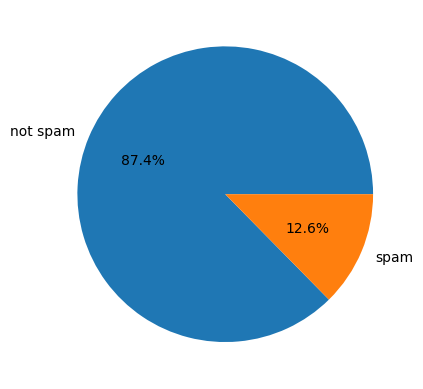

In [33]:
plt.pie(df.target.value_counts(),labels=['not spam','spam'],autopct='%.1f%%')
plt.show()
# which shows  data imbalance               

In [8]:
import nltk 
#nltk.download("punkt")

In [9]:
df['no_of_characters']=df['text'].apply(len)

In [10]:
df['no_of_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [11]:
df['no_of_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [12]:
df

,target,text,no_of_characters,no_of_words,no_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
no_of_words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
no_of_sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


In [13]:
# Encoding target
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df

# 0 is ham and 1 is spam

,target,text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [49]:
#  analysis 
df[df.target==0].describe()

,target,no_of_characters,no_of_words,no_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [50]:
df[df.target==1].describe()

,target,no_of_characters,no_of_words,no_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


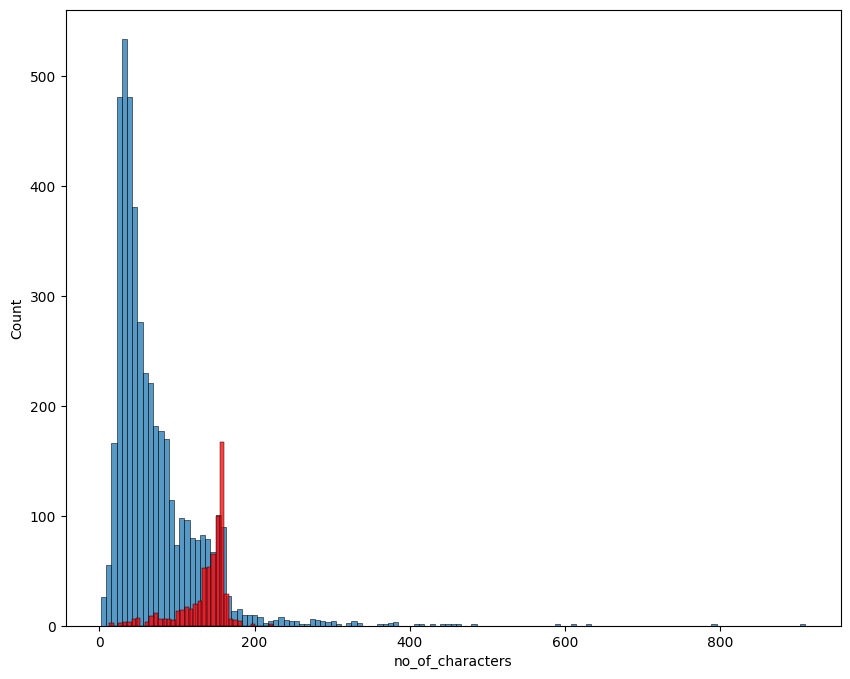

In [55]:
# visualisation
plt.figure(figsize=(10,8))
sns.histplot(df[df.target==0]['no_of_characters'])
sns.histplot(df[df.target==1]['no_of_characters'],color='red')
plt.show()

#  non spam   has some outliers too ie. 800 ,600  has some count too.
# spam has  more  characters

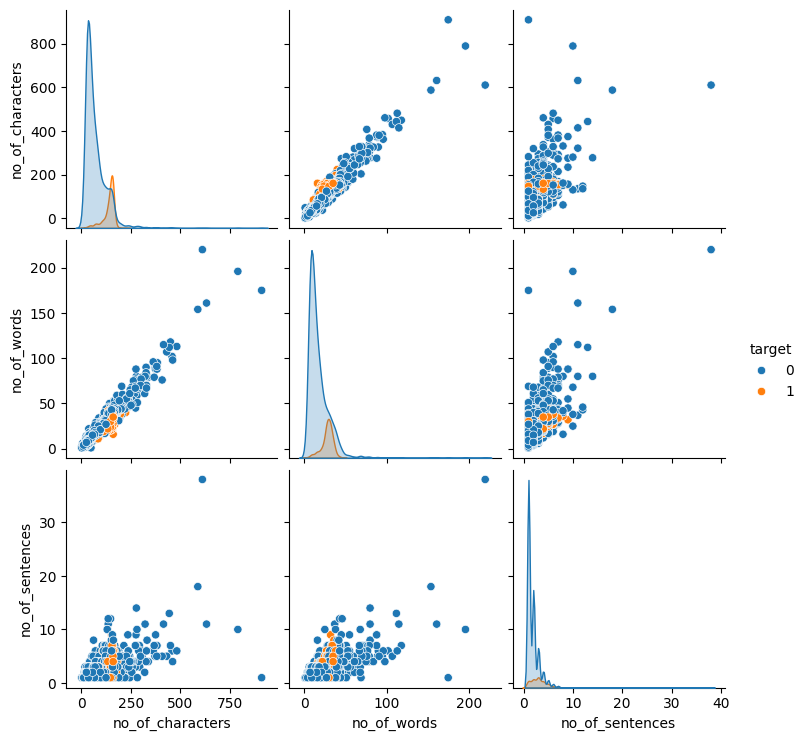

In [57]:
# using pairplot
sns.pairplot(data=df,hue='target')
plt.show()

In [60]:
df2=df.drop('text',axis=1)

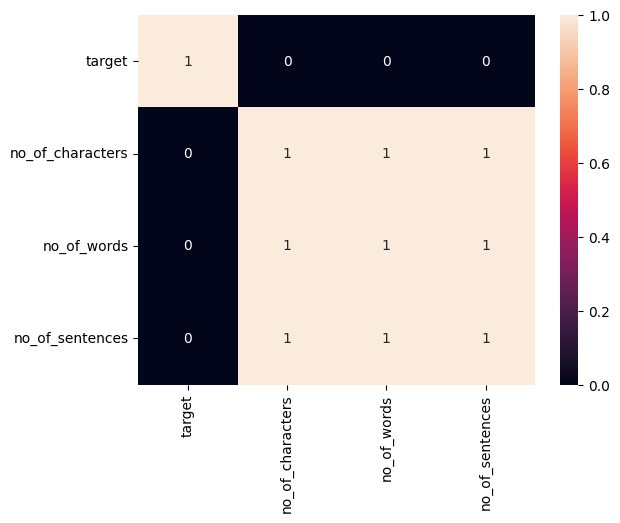

In [63]:
## finding correlation using heatmap
sns.heatmap(df2.corr()>0.5,annot=True)
plt.show()

# 3Data preprocessing
  .convert into lowercase
  .tokenization
  .removing special charactes
  .removing stop words and punctuation
  .stemming

In [72]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
#using portstemer
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [16]:
import string

In [17]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]

    # removing  especial charcaters
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and  i not in string.punctuation:
            y.append(i)

    result=[]
    for i in y:
        result.append(ps.stem(i))
        
            

    return ' '.join(result)


        


print(transform_text('Tula am i logingg loving  RAM %%23 ??'))

tula logingg love ram 23


In [18]:
df['transformed_text']=df['text'].apply(transform_text)

In [19]:
df


,target,text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [ ]:
nltk.download('stopwords')

In [20]:
from wordcloud import WordCloud


# word cloud for  spam 

In [22]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spacm_wc=wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=' '))

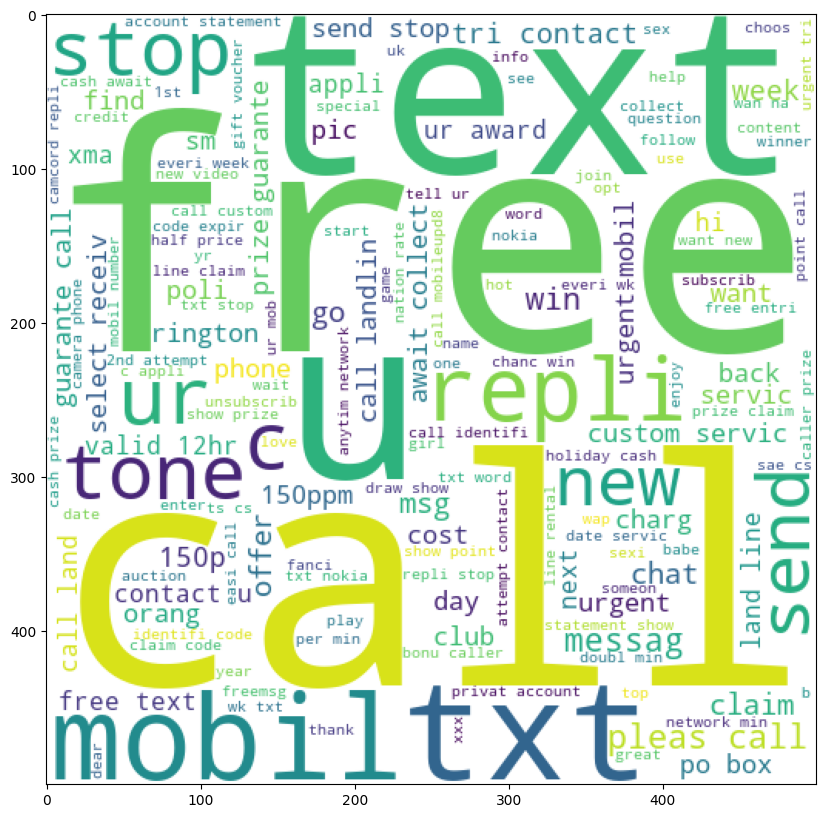

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(spacm_wc)
plt.show()

In [ ]:
# word cloud for  non spam

In [25]:
#wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spacm_wc_pos=wc.generate(df[df.target==0]['transformed_text'].str.cat(sep=' '))

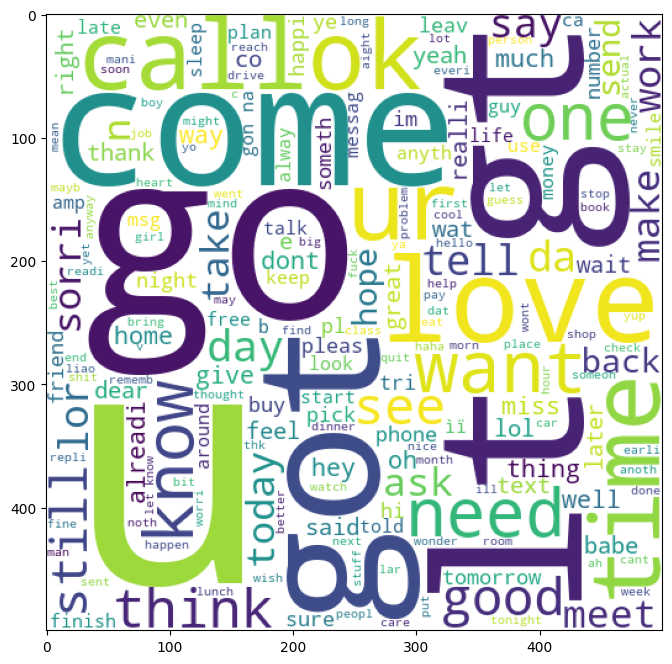

In [27]:
plt.figure(figsize=(20,8))
plt.imshow(spacm_wc_pos)
plt.show()

In [55]:
# finding most frequent words in spam and non spam

def get_30(data):
    spam_corpus=[]
    for msg in df[df.target==data]['transformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)
    return spam_corpus
    

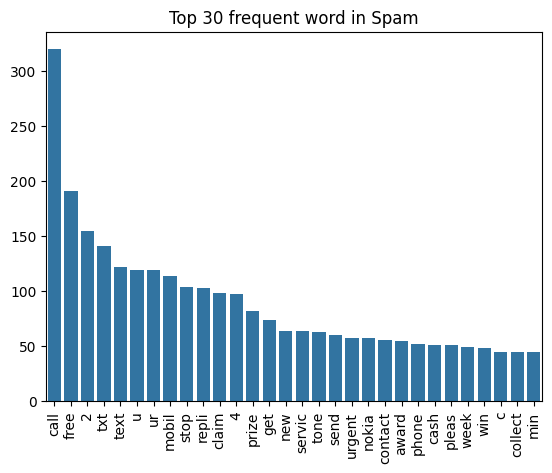

In [56]:
from  collections import Counter
counter=Counter(get_30(1))
most_common=counter.most_common(30)
words,counts=zip(*most_common)
plt.title("Top 30 frequent word in Spam")
sns.barplot(x=list(words),y=list(counts))

plt.xticks(rotation=90)
plt.show()

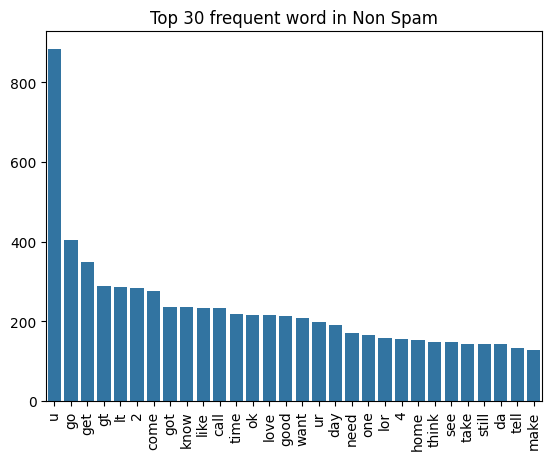

In [57]:
counter=Counter(get_30(0))
most_common=counter.most_common(30)
words,counts=zip(*most_common)
plt.title("Top 30 frequent word in Non Spam")
sns.barplot(x=list(words),y=list(counts))

plt.xticks(rotation=90)
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [22]:
X=cv.fit_transform(df.transformed_text).toarray()

In [23]:
X.shape

(5169, 6708)

In [24]:
y=df.target.values

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)
X_train.shape,y_train.shape

((4135, 6708), (4135,))

# Model Selection

In [26]:
bn=BernoulliNB()
mn=MultinomialNB()
gn=GaussianNB()


In [27]:
def print_metrics(y_pred,y_test):
    print("accuracy score is",accuracy_score(y_test,y_pred))
    print("confusion matrix is: \n  ",confusion_matrix(y_test,y_pred))
    print("precision score is ",precision_score(y_test,y_pred))
    

In [28]:
# bernouli naive bayes 
bn.fit(X_train,y_train)
bn_pred=bn.predict(X_test)
print_metrics(bn_pred,y_test)

accuracy score is 0.9729206963249516
confusion matrix is: 
   [[897   1]
 [ 27 109]]
precision score is  0.990909090909091


In [29]:
# using gaussian naive bayes classifier
gn.fit(X_train,y_train)
gn_pred=gn.predict(X_test)
print_metrics(gn_pred,y_test)


accuracy score is 0.8636363636363636
confusion matrix is: 
   [[782 116]
 [ 25 111]]
precision score is  0.4889867841409692


In [30]:
# using multinomial gaussian naibe bayes classifier
mn.fit(X_train,y_train)
mn_pred=mn.predict(X_test)
print_metrics(mn_pred,y_test)


accuracy score is 0.9700193423597679
confusion matrix is: 
   [[881  17]
 [ 14 122]]
precision score is  0.8776978417266187


In [ ]:
# naive bayes is the most suited for classification problem 
#using other algorithm for classification

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [39]:
svc=SVC(kernel='sigmoid',gamma=1.0)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
ada=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
rnd=RandomForestClassifier(n_estimators=50,random_state=2)
ext=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbt=GradientBoostingClassifier(n_estimators=50,random_state=2)


In [47]:
clfs={'SVC':svc,'kn':knc,'BernouliNaive':bn,'DecisionTree':dtc,'lr':lrc,'abc':ada,'XGB':xgb,'etc':ext,'GBT':gbt,'RND':rnd}

In [41]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision
    

In [43]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.925531914893617, 0.7251908396946565)

In [48]:
# 
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    c_accuracy,c_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print('for',name)
    print('Accuracy',c_accuracy)
    print('Precison',c_precision)
    accuracy_scores.append(c_accuracy)
    precision_scores.append(c_precision)

for SVC
Accuracy 0.925531914893617
Precison 0.7251908396946565
for kn
Accuracy 0.9110251450676983
Precison 1.0
for BernouliNaive
Accuracy 0.9729206963249516
Precison 0.990909090909091
for DecisionTree
Accuracy 0.9390715667311412
Precison 0.9101123595505618
for lr
Accuracy 0.9709864603481625
Precison 0.9568965517241379


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for abc
Accuracy 0.965183752417795
Precison 0.9385964912280702
for XGB
Accuracy 0.9700193423597679
Precison 0.9646017699115044
for etc
Accuracy 0.9690522243713733
Precison 0.9905660377358491
for GBT
Accuracy 0.9545454545454546
Precison 0.9494949494949495
for RND
Accuracy 0.9642166344294004
Precison 1.0


In [50]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df



,Algorithm,Accuracy,Precision
0,SVC,0.925532,0.725191
1,kn,0.911025,1.000000
2,BernouliNaive,0.972921,0.990909
3,DecisionTree,0.939072,0.910112
4,lr,0.970986,0.956897
5,abc,0.965184,0.938596
6,XGB,0.970019,0.964602
7,etc,0.969052,0.990566
8,GBT,0.954545,0.949495
9,RND,0.964217,1.000000


# out of all, BernouliNaive has the best performance overall, having  precision 0.9909 and accuracy of 0.97

In [53]:
import pickle
pickle.dump(bn,open("email_spam_classifier.pkl",'wb'))


In [57]:
ef=pickle.load(open('email_spam_classifier.pkl','rb'))
ef


BernoulliNB()